In [254]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from collections import Counter
import numpy as np

In [12]:
with open('data/world_bank_projects.json') as jsonfile:
    data = json.load(jsonfile)

In [16]:
df = json_normalize(data)

In [17]:
df.head()

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,52b213b38594d8a2be17c783,2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,Participation and civic engagement,50,"[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,52b213b38594d8a2be17c784,2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,Export development and competitiveness,30,"[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [18]:
df.columns

Index(['_id.$oid', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract.cdata', 'project_name',
       'projectdocs', 'projectfinancialtype', 'projectstatusdisplay',
       'regionname', 'sector', 'sector1.Name', 'sector1.Percent',
       'sector2.Name', 'sector2.Percent', 'sector3.Name', 'sector3.Percent',
       'sector4.Name', 'sector4.Percent', 'sector_namecode', 'sectorcode',
       'source', 'status', 'supplementprojectflg', 'theme1.Name',
       'theme1.Percent', 'theme_namecode', 'themecode', 'totalamt',
       'totalcommamt', 

In [19]:
df.describe()

,grantamt,ibrdcommamt,idacommamt,lendprojectcost,sector1.Percent,sector2.Percent,sector3.Percent,sector4.Percent,theme1.Percent,totalamt,totalcommamt
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,380.000000,265.000000,174.000000,500.000000,5.000000e+02,5.000000e+02
mean,4.432400e+06,3.286010e+07,3.542136e+07,1.547241e+08,68.164000,24.610526,14.815094,10.712644,43.918000,6.828146e+07,7.271386e+07
std,2.023307e+07,1.089197e+08,7.681431e+07,4.764211e+08,25.485371,12.207567,7.489371,6.658313,33.431102,1.242662e+08,1.234705e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,3.000000e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,6.472500e+06,49.000000,17.000000,10.000000,6.000000,17.000000,0.000000e+00,5.000000e+06
50%,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+07,67.500000,25.000000,14.000000,10.000000,33.000000,2.000000e+07,2.500000e+07
75%,1.695000e+06,0.000000e+00,3.700000e+07,1.021250e+08,97.000000,30.000000,20.000000,14.000000,70.000000,8.625000e+07,9.045000e+07
max,3.650000e+08,1.307800e+09,6.000000e+08,5.170000e+09,100.000000,95.000000,47.000000,57.000000,100.000000,1.307800e+09,1.307800e+09


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 55 columns):
_id.$oid                    500 non-null object
approvalfy                  500 non-null object
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 no

In [ ]:
# Find the 10 countries with most projects

In [21]:
df['countryname'].head()

0    Federal Democratic Republic of Ethiopia
1                        Republic of Tunisia
2                                     Tuvalu
3                          Republic of Yemen
4                         Kingdom of Lesotho
Name: countryname, dtype: object

In [234]:
country = df['countryname'].value_counts(dropna=False).head(10)

In [235]:
countrydata=pd.DataFrame(country)

In [236]:
cdata=countrydata.reset_index()

In [237]:
cdata.columns = ['CountryName','Counts']

In [238]:
cdata

,CountryName,Counts
0,Republic of Indonesia,19
1,People's Republic of China,19
2,Socialist Republic of Vietnam,17
3,Republic of India,16
4,Republic of Yemen,13
5,Nepal,12
6,Kingdom of Morocco,12
7,People's Republic of Bangladesh,12
8,Africa,11
9,Republic of Mozambique,11


In [118]:
list_country = list(cdata['CountryName'])

In [119]:
list_country

['Republic of Indonesia',
 "People's Republic of China",
 'Socialist Republic of Vietnam',
 'Republic of India',
 'Republic of Yemen',
 'Nepal',
 'Kingdom of Morocco',
 "People's Republic of Bangladesh",
 'Africa',
 'Republic of Mozambique']

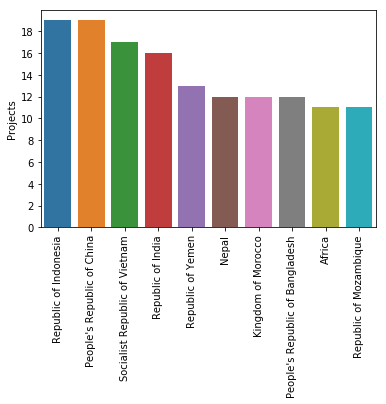

In [153]:
ax=sns.barplot(list_country,y=cdata['Counts'])
ax.set_xticklabels(list_country,rotation=90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel='Projects')
plt.show()

In [ ]:
#Find the top 10 major project themes (using column 'mjtheme_namecode')

In [187]:
theme = json_normalize(data,'mjtheme_namecode')

In [239]:
themedf = pd.DataFrame(theme.name.value_counts(dropna=False).head(10)).reset_index()

In [240]:
themedf.columns = ['Project Theme','Counts']

In [241]:
themedf

,Project Theme,Counts
0,Environment and natural resources management,223
1,Rural development,202
2,Human development,197
3,Public sector governance,184
4,Social protection and risk management,158
5,Financial and private sector development,130
6,,122
7,Social dev/gender/inclusion,119
8,Trade and integration,72
9,Urban development,47


In [202]:
pt = list(themedf['Project Theme'])
pt

['Environment and natural resources management',
 'Rural development',
 'Human development',
 'Public sector governance',
 'Social protection and risk management',
 'Financial and private sector development',
 '',
 'Social dev/gender/inclusion',
 'Trade and integration',
 'Urban development']

In [203]:
ct = list(themedf['Counts'])
ct

[223, 202, 197, 184, 158, 130, 122, 119, 72, 47]

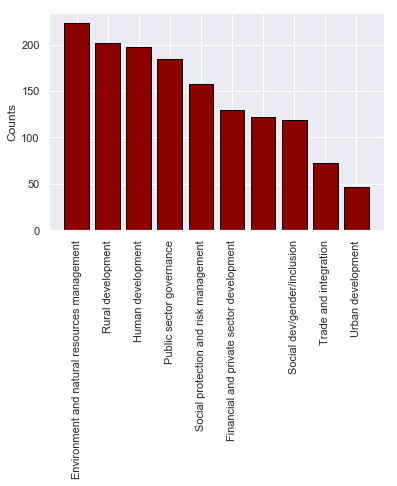

In [218]:
sns.set()
plt.bar(pt,ct,color='darkred',edgecolor='black')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#In 2. above you will notice that some entries have only the code and the name is missing. 
#Create a dataframe with the missing names filled in.

In [ ]:
#I created a copy of theme dataframe and replaced the empty strings with NaN and dropped them along with duplicates
#to get a lookup table 'themecopy'

In [333]:
themecopy = theme.copy()

In [334]:
themecopy = themecopy.replace('',np.NaN).drop_duplicates().dropna(axis=0)
themecopy

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [335]:
zippedtheme = dict(zip(themecopy['code'],themecopy['name']))
print(zippedtheme)

{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [ ]:
#I am getting a dataframe with only the NaN values

In [356]:
theme[theme['name'].isnull()].count()

code    122
name      0
dtype: int64

In [307]:
table = theme[theme['name'].isnull()]

In [309]:
table.head()

,code,name
1,11,NaN
13,6,NaN
17,8,NaN
19,7,NaN
24,2,NaN


In [ ]:
#The function fillnavalues looks up the zippedtheme dictionary keys with the 'code' present in the empty NaN table
# and returns the expected values

In [350]:
def fillnavalues(code):
    name = []
    for x,y in zippedtheme.items():
        if x == code:
            name.append(y)
    return ''.join(name)     

In [351]:
table['name'] = table['code'].apply(lambda x: fillnavalues(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [355]:
table.head()

,code,name
1,11,Environment and natural resources management
13,6,Social protection and risk management
17,8,Human development
19,7,Social dev/gender/inclusion
24,2,Public sector governance


In [357]:
theme.head()

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [ ]:
#Theme table and the newly filled table are concatenated and the resultant table will have the NaN values dropped 
#with their indices sorted!

In [358]:
resulttable = pd.concat([table,theme])

In [386]:
resulttable = resulttable.dropna(axis=0).sort_index()

In [387]:
resulttable

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [377]:
theme

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [ ]:
#checking if the result table is actually filled!

In [378]:
theme.loc[1477,:]

code     11
name    NaN
Name: 1477, dtype: object

In [388]:
resulttable.loc[1477,:]

code                                              11
name    Environment and natural resources management
Name: 1477, dtype: object